- Create/Perform a CNN model for MNIST Fashion dataset
- build the network only with train data and test with test data
- epochs = 50
- batch size = (reg.no < 25 -> reg.no * 3) (reg.no > 25 -> reg.no * 2)


In [ ]:
!pip install ann_visualizer
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=065d8da885f5d973abb6c364e3cfef6d23a2082b5022b6cf03f8dc29d15dc77b
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 18.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten, Activation, Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from ann_visualizer.visualize import ann_viz
import visualkeras
from keras.utils import plot_model

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Train data Size : ",X_train.shape)
print("Test data Size : ", X_test.shape)

Train data Size :  (60000, 28, 28)
Test data Size :  (10000, 28, 28)


In [ ]:
#fashion_mnist category -> 10

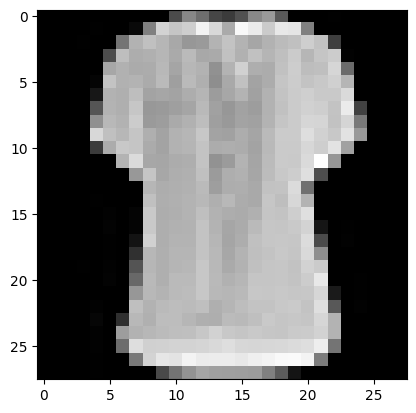

In [ ]:
plt.imshow(X_train[55], cmap = 'gray')

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
data = fashion_mnist.load_data()

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28,28, 1).astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
model = Sequential([
    Convolution2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPool2D(pool_size = (2,2)),
    Convolution2D(16, (3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Convolution2D(16, (3,3), activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)         0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
ann_viz(model, view = True, filename = 'FASHION_CNN', title = "CNN - fashion_MNIST")

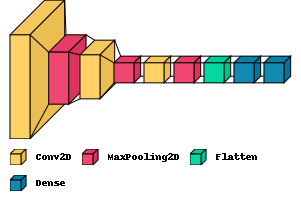

In [ ]:
visualkeras.layered_view(model, legend = True)

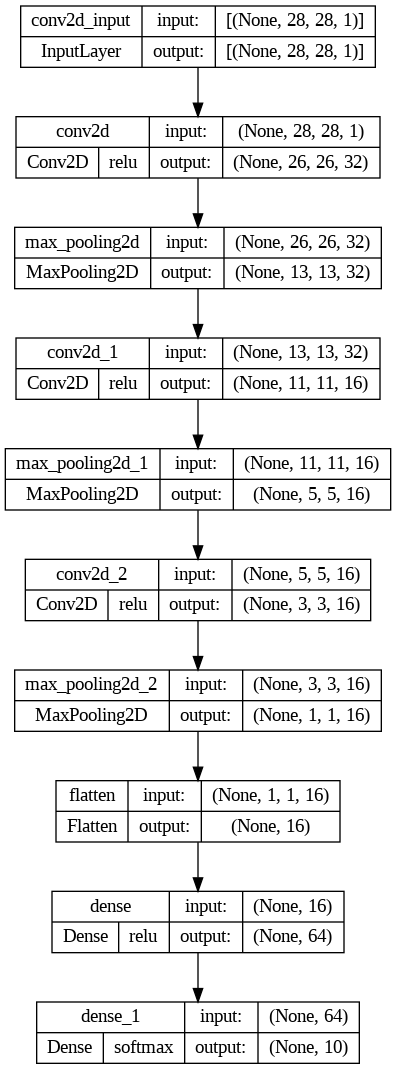

In [ ]:
plot_model(model, show_shapes = True, show_dtype = False, to_file = 'CNN.png', show_layer_names = True, expand_nested =True, dpi = 96, layer_range = None, show_layer_activations = True)

In [ ]:
model.fit(X_train, y_train, batch_size = 74, epochs = 50)

Epoch 1/50
811/811 [==============================] - 17s 4ms/step - loss: 2.2468 - accuracy: 0.2177
Epoch 2/50
811/811 [==============================] - 4s 4ms/step - loss: 1.1352 - accuracy: 0.5813
Epoch 3/50
811/811 [==============================] - 4s 5ms/step - loss: 0.8504 - accuracy: 0.6852
Epoch 4/50
811/811 [==============================] - 3s 4ms/step - loss: 0.7657 - accuracy: 0.7199
Epoch 5/50
811/811 [==============================] - 3s 4ms/step - loss: 0.7018 - accuracy: 0.7426
Epoch 6/50
811/811 [==============================] - 4s 5ms/step - loss: 0.6537 - accuracy: 0.7576
Epoch 7/50
811/811 [==============================] - 3s 4ms/step - loss: 0.6207 - accuracy: 0.7707
Epoch 8/50
811/811 [==============================] - 3s 4ms/step - loss: 0.5968 - accuracy: 0.7790
Epoch 9/50
811/811 [==============================] - 4s 5ms/step - loss: 0.5776 - accuracy: 0.7885
Epoch 10/50
811/811 [==============================] - 4s 4ms/step - loss: 0.5623 - accuracy: 0.793

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
prediction = y_pred.argmax(axis = 1)
prediction[0]

9

predicted class : Ankle boot


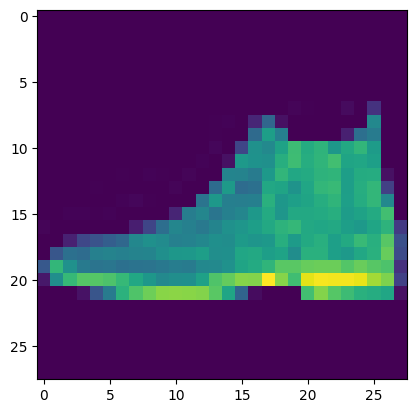

In [ ]:
print(f"predicted class : {class_names[prediction[0]]}")
plt.imshow(X_test[0])
plt.show()

1/1 [==============================] - 0s 21ms/step
predicted class : Pullover


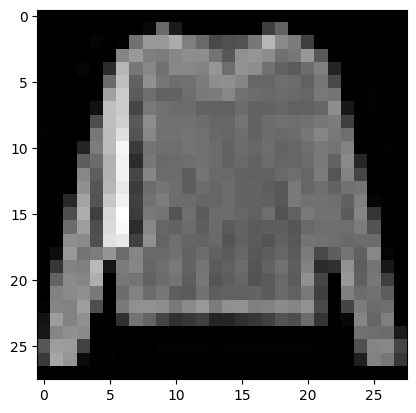

1/1 [==============================] - 0s 33ms/step
predicted class : Pullover


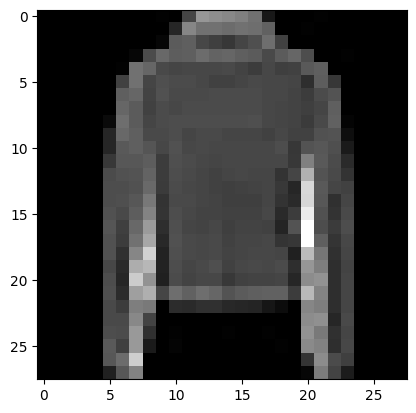

1/1 [==============================] - 0s 38ms/step
predicted class : Coat


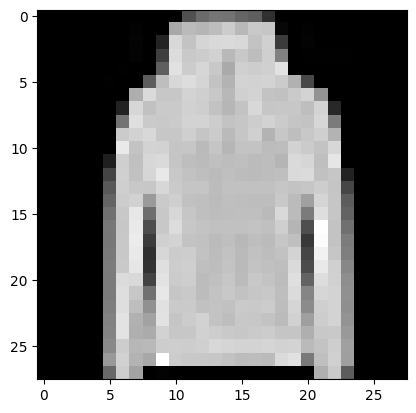

1/1 [==============================] - 0s 27ms/step
predicted class : Ankle boot


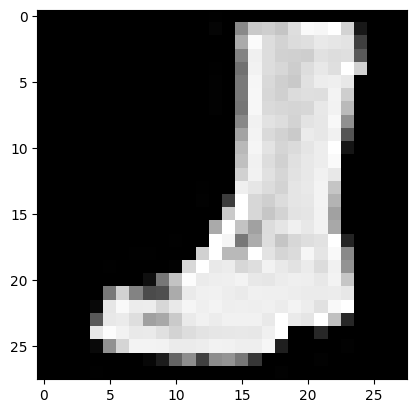

1/1 [==============================] - 0s 27ms/step
predicted class : Coat


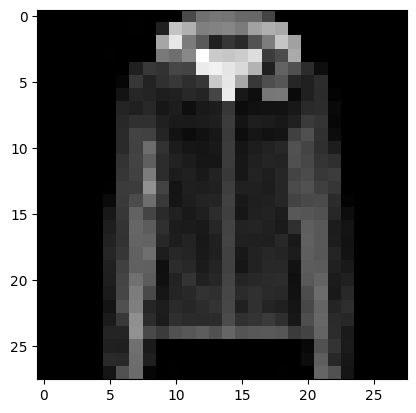

1/1 [==============================] - 0s 18ms/step
predicted class : Pullover


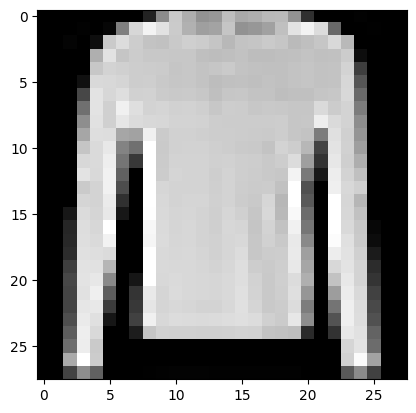

1/1 [==============================] - 0s 24ms/step
predicted class : T-shirt/top


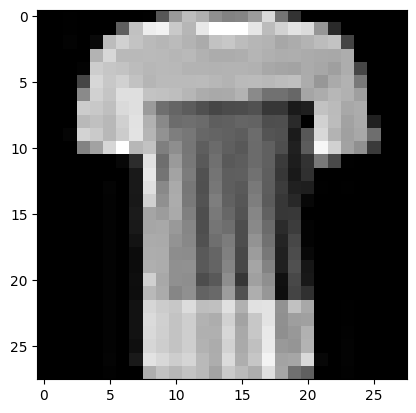

1/1 [==============================] - 0s 18ms/step
predicted class : Coat


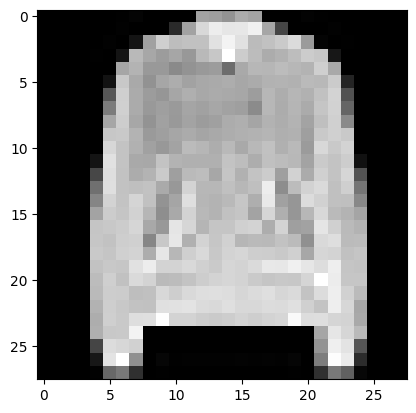

1/1 [==============================] - 0s 19ms/step
predicted class : Pullover


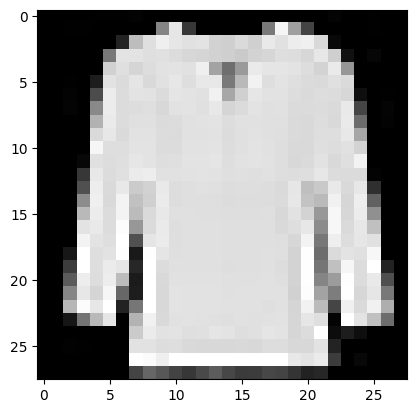

1/1 [==============================] - 0s 18ms/step
predicted class : T-shirt/top


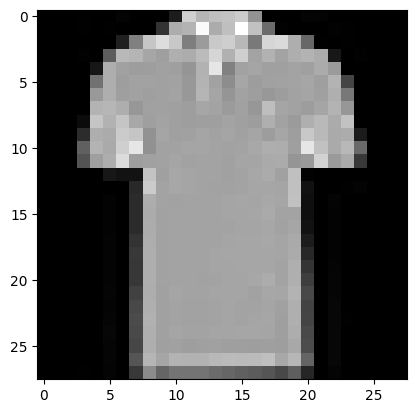

In [ ]:
for i in np.random.choice(np.arange(0, len(y_test)),size = (10,)):
  pred = model.predict(X_test[np.newaxis,i])
  prediction = pred.argmax(axis = 1)
  image = (X_test[i] * 255).reshape((28,28)).astype('uint8')
  print(f"predicted class : {class_names[prediction[0]]}")
  plt.imshow(image, cmap = 'gray')
  plt.show()